In [83]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# authorization
cid = '5b85a9af539f47da8dcbbcf517e42650'
secret = 'cb3ce73abd464866b285015d631ca1d5'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [84]:
valenceForEmotion = {} #for lasya

def call_playlist(playlist_url, limit, offset):
    # NOTE: use playlist_url instead of playlist_id. playlist_id doesn't accept limit and offset parameters for some reason?
    
    # create an empty list and an empty df
    playlist_features_list = ['artist', 'album', 'track_name', 'track_id', 'danceability', 'energy', 'loudness',
                              'valence', 'tempo', 'duration_ms', 'acousticness']
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # loop through the specified playlist and extract wanted features
    playlist = sp.user_playlist_tracks('', playlist_url, limit=limit, offset=offset)["items"]
    for track in playlist:

        # create empty dict
        playlist_features = {}

        # get metadata
        playlist_features['artist'] = track['track']['album']['artists'][0]['name']
        playlist_features['album'] = track['track']['album']['name']
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
#        playlist_features["explicit"] = track["track"]["explicit"]
        playlist_features["popularity"] = track["track"]["popularity"]
        playlist_features["album_release_date"] = track["track"]["album"]["release_date"]
#         playlist_features["duration_ms"] = track["track"]["duration_ms"]
#         playlist_features['added_by'] = track["added_by"]["id"]
#         playlist_features['added_at'] = track["added_at"]
        
        # get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
            
            # DO NOT DELETE - LASYA NEEDS FOR VALENCE ANALYSIS 
            if (feature == "valence"):
                valenceForEmotion[playlist_features['track_name']] = audio_features["valence"]
        
        # concat dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    #
    print(playlist_df.valence[2])
    #
    # return df
    return playlist_df

In [85]:
first100 = call_playlist('https://open.spotify.com/playlist/2U9q9cml8EInaiYFDYwZ73?si=1f188bb952c041c1', 100, 0)

0.399


In [86]:
hungryGuysRadio = pd.concat([first100], ignore_index = True)

In [87]:
hungryGuysRadio.head(13)

,artist,album,track_name,track_id,danceability,energy,loudness,valence,tempo,duration_ms,acousticness,popularity,album_release_date
0,Various Artists,Happy New Year,India Waale,69EoR3Z8jgRODL3AmQs5ZP,0.720,0.75300,-5.453,0.6190,128.016,237715,0.037800,48.0,2014-09-26
1,The Kid LAROI,F*CK LOVE 3: OVER YOU,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,0.591,0.76400,-5.484,0.4780,169.928,141806,0.038300,92.0,2021-07-23
2,THE ANXIETY,THE ANXIETY,Meet Me At Our Spot,07MDkzWARZaLEdKxo6yArG,0.773,0.47000,-7.930,0.3990,94.995,162680,0.015300,92.0,2020-03-13
3,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.514,0.73000,-5.934,0.3340,171.005,200040,0.001460,93.0,2020-03-20
4,Dua Lipa,Future Nostalgia,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,0.702,0.82500,-3.787,0.9150,102.977,203064,0.008830,88.0,2020-03-27
5,Drake,Certified Lover Boy,Way 2 Sexy (with Future & Young Thug),0k1WUmIRnG3xU6fvvDVfRG,0.803,0.59700,-6.035,0.3310,136.008,257605,0.000619,91.0,2021-09-03
6,Playboi Carti,Whole Lotta Red,Sky,29TPjc8wxfz4XMn21O7VsZ,0.785,0.90300,-4.184,0.5650,139.980,193234,0.258000,88.0,2020-12-25
7,Ludwig van Beethoven,"Beethoven: Piano Sonatas, Vol.3","Sonata No. 14 ""Moonlight"" in C-Sharp Minor"", O...",3DNRdudZ2SstnDCVKFdXxG,0.184,0.00527,-37.264,0.1510,170.612,315427,0.995000,70.0,2007-09-25
8,Mariah Carey,Merry Christmas,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,0.336,0.62700,-7.463,0.3500,150.273,241107,0.164000,94.0,1994-11-01
9,Céline Dion,Let's Talk About Love,"My Heart Will Go On - Love Theme from ""Titanic""",33LC84JgLvK2KuW43MfaNq,0.428,0.27600,-11.729,0.0382,99.195,280000,0.732000,76.0,1997-10-24


In [88]:
'''
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Valence', 'Danceability', 'Energy')
indexer = 0
y_pos = np.arange(len(objects))
#performance = [10,8,6,4]
performance = [first100.valence[indexer], first100.danceability[indexer], first100.energy[indexer]]

plt.barh(y_pos, performance, 0.3, align='center', alpha=0.9)
plt.yticks(y_pos, objects)
plt.xlabel('Mean Value')
plt.title(first100.track_name[indexer] + ' Audio Analysis')

plt.show()
'''

"\nimport matplotlib.pyplot as plt; plt.rcdefaults()\nimport numpy as np\nimport matplotlib.pyplot as plt\n\nobjects = ('Valence', 'Danceability', 'Energy')\nindexer = 0\ny_pos = np.arange(len(objects))\n#performance = [10,8,6,4]\nperformance = [first100.valence[indexer], first100.danceability[indexer], first100.energy[indexer]]\n\nplt.barh(y_pos, performance, 0.3, align='center', alpha=0.9)\nplt.yticks(y_pos, objects)\nplt.xlabel('Mean Value')\nplt.title(first100.track_name[indexer] + ' Audio Analysis')\n\nplt.show()\n"

In [89]:
import numpy as np
import matplotlib.pyplot as plt

def graphPrinter(name1, name2):
# data to plot
    index1 = int(0)
    index2 = int(1)
    count = 0
#   print(name1)
#   print(name2)
    for index, row in first100.iterrows():
        nameTest = str(row['track_name'])
#        print(nameTest)
        if name1 == nameTest:
            index1 = count
        elif name2 == nameTest:
            index2 = count
        count = count + 1
#    print(index1)
#    print(index2)
    
    n_groups = 4
    means_first = (first100.valence[index1]*100, first100.danceability[index1]*100, first100.energy[index1]*100, first100.tempo[index1])
    means_second = (first100.valence[index2]*100, first100.danceability[index2]*100, first100.energy[index2]*100, first100.tempo[index2])

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 0.8

    rects1 = plt.bar(index, means_first, bar_width,
    alpha=opacity,
    color='b',
    label=name1)

    rects2 = plt.bar(index + bar_width, means_second, bar_width,
    alpha=opacity,
    color='g',
    label=name2)

    plt.xlabel('')
    plt.ylabel('Mean Values')
    plt.title('Audio Analysis Comparison')
    plt.xticks(index + bar_width, ('Valence (x100)', 'Danceability (x100)', 'Energy (x100)', 'Tempo'))
    plt.legend()

    plt.tight_layout()
    plt.show()

What is the first track you would like to analyze? Sky
Which track would you like to compare it to? Sky


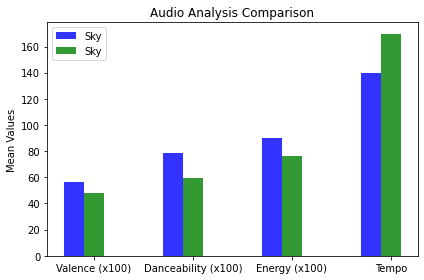

In [90]:
name1 = str(input('What is the first track you would like to analyze? '))
name2 = str(input('Which track would you like to compare it to? '))

graphPrinter(name1, name2)

Emotions associated with your music are average, slightly on the sadder side.
Your average valance is 0.48232307692307685


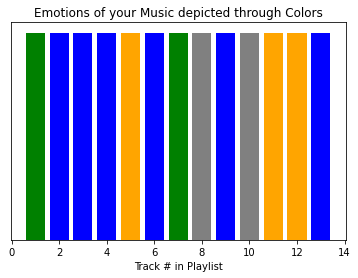

In [91]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np
import spotipy as sp
from termcolor import colored

totalValence = 0.0
count = 0
songsForEmotion = []
graphHeight = []
colorsForEmotion = []

for key, value in valenceForEmotion.items():
    totalValence += value
    count += 1
    songsForEmotion.append(count) 
    graphHeight.append(1) # every bar will have same height
    #print("The valence of " + key + " is " + str(value))
    
    if (value < 0.3):
        colorsForEmotion.append("gray")
    elif (value < 0.5):
        colorsForEmotion.append("blue")
    elif (value < 0.7):
        colorsForEmotion.append("green")
    else:
        colorsForEmotion.append("orange")
    
avgValence = totalValence / count

if (avgValence < 0.3):
    print(colored("Emotions associated with your music are very sad and gloomy.", 'gray'))
    print("Your average valence is " + str(avgValence))
elif (avgValence < 0.5):
    print(colored("Emotions associated with your music are average, slightly on the sadder side.", 'blue'))
    print("Your average valance is " + str(avgValence))
elif (avgValence < 0.7):
    print(colored("Emotions associated with your music are average, slightly on the happier side.", 'green'))
    print("Your average valance is " + str(avgValence))
else:
    print(colored("Emotions associated with your music are very happy and hype.", 'orange'))
    print("Your average valance is " + str(avgValence))
    
    
plt.bar(songsForEmotion, graphHeight, color=colorsForEmotion)
plt.title('Emotions of your Music depicted through Colors')
plt.xlabel('Track # in Playlist')
plt.yticks([])
plt.show()

Enter first feature energy
Enter second feature loudness


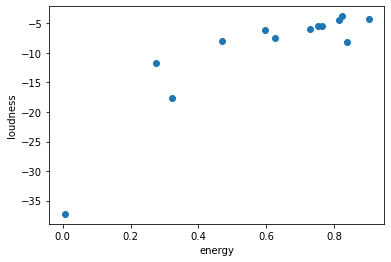

'\nxFeature = 1\nyFeature = 2\n\nif xFeature == 1 and yFeature == 2:\n    first_and_second_by_track = (\n        data.groupby(\'track\')[[featuresArray[0], featuresArray[1]]].sum()\n        .reset_index())\n    print(energy_and_danceability_by_country.head())\n    \n# Plot the data\n\nch = chartify.Chart(blank_labels=True)\nch.plot.scatter(\n    data_frame=energy_and_danceability_by_track,\n    x_column= featuresArray[0],\n    y_column= featuresArray[1],\n    color_column=\'track\')\nch.style.color_palette.reset_palette_order()\nch.plot.text(\n    data_frame=price_and_quantity_by_country,\n    x_column= featuresArray[0],\n    y_column= featuresArray[1],\n    text_column=\'track\',\n    color_column=\'track\',\n    x_offset=1,\n    y_offset=-1,\n    font_size=\'10pt\')\nch.set_title("Energy and Danceability Correlation")\nch.set_subtitle("Labels for specific observations.")\nch.show(\'png\')\n'

In [92]:
import chartify
import numpy as np
import matplotlib.pyplot as plt

#data = sp.user_playlist_tracks('', playlist_url, limit=limit, offset=offset)["items"]

featuresArray = ['energy', 'danceability', 'loudness',
                              'valence', 'tempo', 'duration_ms', 'acousticness']

xFeature = str(input('Enter first feature '))
xFeature = xFeature.lower()
yFeature = str(input('Enter second feature '))
yFeature = yFeature.lower()

xArray = []
yArray = []
#data = []

for index, row in first100.iterrows():
#    data.append(row['track_name'])
    xArray.append(row[xFeature])
    yArray.append(row[yFeature])

plt.scatter(xArray, yArray)
plt.xlabel(xFeature)
plt.ylabel(yFeature)
plt.show()

'''
xFeature = 1
yFeature = 2

if xFeature == 1 and yFeature == 2:
    first_and_second_by_track = (
        data.groupby('track')[[featuresArray[0], featuresArray[1]]].sum()
        .reset_index())
    print(energy_and_danceability_by_country.head())
    
# Plot the data

ch = chartify.Chart(blank_labels=True)
ch.plot.scatter(
    data_frame=energy_and_danceability_by_track,
    x_column= featuresArray[0],
    y_column= featuresArray[1],
    color_column='track')
ch.style.color_palette.reset_palette_order()
ch.plot.text(
    data_frame=price_and_quantity_by_country,
    x_column= featuresArray[0],
    y_column= featuresArray[1],
    text_column='track',
    color_column='track',
    x_offset=1,
    y_offset=-1,
    font_size='10pt')
ch.set_title("Energy and Danceability Correlation")
ch.set_subtitle("Labels for specific observations.")
ch.show('png')
'''